In [ ]:
# general dependencies
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize 
from matplotlib import pyplot 

# preprocessing dependencies
from numpy import array
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder, normalize

# model dependencies
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.initializers import LecunNormal
from tensorflow.keras import metrics
from sklearn.model_selection import train_test_split, cross_val_score
import os
from shutil import rmtree
from keras.models import load_model
from sklearn.metrics import accuracy_score
from keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# random forest dependency
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# decision tree dependency
from sklearn.tree import DecisionTreeClassifier

# clustering dependencies
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from statistics import mode





In [ ]:
# one hot encoding
def one_hot_encoding(labels):
  #dic={"labels": label_path}
  df = pd.DataFrame(labels)
  One_hot_vec = pd.get_dummies(df)
  One_hot_vec = One_hot_vec.values
  print("array: ", One_hot_vec)
  return One_hot_vec
#For labels
def label_encoding(labels):
  Label_encoder=LabelEncoder()
  integer_encoded = Label_encoder.fit_transform(array(labels))
  return integer_encoded
  
# map attack types in dataset
def preprocessing(samples, attack_types):
  for i in range (samples.shape[0]):
    for j in range(attack_types.shape[0]):
      if samples[i,41] == attack_types[j, 0]:
        #print(samples[i,41])
        samples[i,41] = attack_types[j, 1]
  return samples

def cat_to_code(samples):
  for col_name in samples.columns:
    if(samples[col_name].dtype == 'object') and (col_name != 'attack_category'):
        #samples[col_name] = samples[col_name].astype('category')
        #samples[col_name] = samples[col_name].cat.codes
        samples[col_name] = one_hot_encoding(samples[col_name])
  return samples

In [ ]:
# define models for ensemble
def model():
  initializer = tf.keras.initializers.LecunNormal()
  model = tf.keras.models.Sequential()
  model.add(Dense(35, input_dim = 42, activation = 'tanh', kernel_initializer = initializer ))
  model.add(Dropout(0.2))
  model.add(Dense(20, activation = 'elu'))
  model.add(Dropout(0.2))
  model.add(Dense(30, activation = 'elu'))
  model.add(Dropout(0.2))
  model.add(Dense(5, activation = 'softmax'))
  model.compile(Adamax(lr = 0.0015), loss = 'categorical_crossentropy', metrics = ['acc'])
  return model

def model2():
  model = tf.keras.models.Sequential()
  model.add(Dense(30, input_dim = 42, activation = 'sigmoid' ))
  model.add(Dropout(0.2))
  model.add(Dense(15, activation = 'sigmoid'))
  model.add(Dropout(0.1))
  model.add(Dense(30, activation = 'sigmoid'))
  model.add(Dense(5, activation='softmax'))
  model.compile(RMSprop(lr = 0.001), loss = 'categorical_crossentropy', metrics = ['acc'])
  return model

def model3():
  model = tf.keras.models.Sequential()
  model.add(Dense(30, input_dim = 42, activation = 'tanh'))
  model.add(Dense(30, activation = 'elu'))
  model.add(Dense(35, activation = 'tanh'))
  model.add(Dense(5, activation = 'softmax'))
  model.compile(SGD(lr = 0.0012), loss = 'categorical_crossentropy', metrics = ['acc'])
  return model

def model4():
  model = tf.keras.models.Sequential()
  model.add(Dense(40, input_dim = 42, activation = 'elu'))
  model.add(Dense(20, activation = 'elu'))
  model.add(Dense(10, activation = 'elu'))
  model.add(Dense(5, activation = 'softmax'))
  model.compile(Adam(lr = 0.0013), loss = 'categorical_crossentropy', metrics = ['acc'])
  return model

def model5():
  initializer = tf.keras.initializers.LecunNormal()
  model = tf.keras.models.Sequential()
  model.add(Dense(40, input_dim = 42, activation = 'elu' ,kernel_initializer = initializer))
  model.add(Dense(35, activation = 'elu'))
  model.add(Dropout(0.2))
  model.add(Dense(40, activation = 'tanh'))
  model.add(Dense(5, activation = 'softmax'))
  model.compile(Adamax(lr = 0.001), loss = 'categorical_crossentropy', metrics = ['acc'])
  return model

In [ ]:
# importing data
samples = pd.read_csv("Dataset.csv")

# preprocessing
samples = cat_to_code(samples)            # To one hot encode the features
print("Now: ", samples)
attack_types = pd.read_csv("Attack_types.csv")
samples = np.array(samples)
attack_types = np.array(attack_types)

print(samples[:, 41])
print(attack_types)
# to change the 23 categories to 5
samples = preprocessing(samples,attack_types)         
print("before: ", samples)
#Extracting the labels from dataset
labels = np.array(samples[:,41])
labelsd=pd.DataFrame(labels)
print("Labels: ", labels)
data = np.delete(samples, 41, axis = 1)
#Normalizing the data
#data = normalize(data)
data = np.asarray(data).astype(np.float32)
#to label encode
labels = label_encoding(labels)
labels = np.asarray(labels).astype(np.float32)
label = labels
labels = to_categorical(labels,num_classes=5)

print("x: ", data.shape)
labels.shape

array:  [[0 1 0]
 [0 0 1]
 [0 1 0]
 ...
 [0 1 0]
 [0 1 0]
 [0 1 0]]
array:  [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
array:  [[0 0 0 ... 0 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 1 0]]
Now:          duration  protocol_type  ...  attack_category  occurance
0              0              0  ...           normal         20
1              0              0  ...           normal         15
2              0              0  ...          neptune         19
3              0              0  ...           normal         21
4              0              0  ...           normal         21
...          ...            ...  ...              ...        ...
125968         0              0  ...          neptune         20
125969         8              0  ...           normal         21
125970         0              0  ...           normal         18
125971         0    

(125973, 5)

In [ ]:
# plot performance of model
def plot_model(classifier):
  pyplot.plot(classifier.history['acc'], label = 'train')
  pyplot.plot(classifier.history['val_acc'], label = 'test')
#pyplot.legend()
  pyplot.show()


    
def save_models(Model, model_no, path):
  filename = path + '\model_' + str(model_no) + '.h5'
  Model.save(filename)
  print('>Saved %s' % filename)

def load_all_models(n_models, path):
  all_models = list()
  for i in range(n_models):
    filename = path + '\model_' + str(i + 1) + '.h5'
		# load model from file
    model = load_model(filename)
		# add to list of members
    all_models.append(model)
    print('>loaded %s' % filename)
  return all_models



In [ ]:
#Directories for saving models
def create_newpath():
  newpath = r"hey"
  if newpath != r'C:\Users\Ghulam Gharibi\Desktop\6th semester\CS351_AI\Lab\project\models':
    newpath = r'C:\Users\Ghulam Gharibi\Desktop\6th semester\CS351_AI\Lab\project\models' 
  else:
    if os.path.isdir(newpath) == True:
      rmtree(newpath)
    else:
      os.mkdir(newpath)
def create_cluster_path():
  cluster_path = r"hey"
  if cluster_path != r'C:\Users\Ghulam Gharibi\Desktop\6th semester\CS351_AI\Lab\project\cluster_models':
    cluster_path = r'C:\Users\Ghulam Gharibi\Desktop\6th semester\CS351_AI\Lab\project\cluster_models' 
  else:
    if os.path.isdir(cluster_path) == True:
      rmtree(cluster_path)
    else:
      os.mkdir(cluster_path)


In [ ]:
#Hard Voting Ensemble 
def ensemble_predictions(members,testX):
  all_models_prediction = [model.predict(testX) for model in members]
  all_models_prediction = np.array(all_models_prediction)
  #print("pred: ", all_models_prediction)
  summed=np.sum(all_models_prediction, axis = 0)
  result = np.argmax(summed, axis = 1)
  print("result: ", result.shape)
  return result

In [ ]:
# training model 1
def train_model(dataset,labels_list,path,models_train_acc,models_test_acc,model_no, earlystopping):
  X_train, X_test, y_train, y_test = train_test_split(dataset, labels_list, test_size = 0.1, random_state = 42)
  Model = model()
  history = Model.fit(X_train, y_train, epochs = 100, verbose = 1, validation_data = (X_test, y_test), callbacks = earlystopping)
  _, train_acc = Model.evaluate(X_train, y_train, verbose = 0)
  _, test_acc = Model.evaluate(X_test, y_test, verbose = 0)
  print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
  models_train_acc.append(train_acc)
  models_test_acc.append(test_acc)
  save_models(Model, model_no, path)
  plot_model(history)

# training model 2
def train_model2(dataset,labels_list,path,models_train_acc,models_test_acc,model_no, earlystopping):
  X_train, X_test, y_train, y_test = train_test_split(dataset, labels_list, test_size = 0.3, random_state = 35)
  Model = model2()
  history = Model.fit(X_train, y_train, epochs = 70, verbose = 1, validation_data = (X_test, y_test), callbacks = earlystopping)
  _, train_acc = Model.evaluate(X_train, y_train, verbose = 0)
  _, test_acc = Model.evaluate(X_test, y_test, verbose = 0)
  print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
  models_train_acc.append(train_acc)
  models_test_acc.append(test_acc)
  save_models(Model, model_no, path)
  plot_model(history)

# training model 3
def train_model3(dataset,labels_list,path,models_train_acc,models_test_acc,model_no, earlystopping):
  X_train, X_test, y_train, y_test = train_test_split(dataset, labels_list, test_size = 0.3, random_state = 35)
  Model = model3()
  history = Model.fit(X_train, y_train, epochs = 100, verbose = 1, validation_data = (X_test, y_test), callbacks = earlystopping)
  _, train_acc = Model.evaluate(X_train, y_train, verbose = 0)
  _, test_acc = Model.evaluate(X_test, y_test, verbose = 0)
  print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
  models_train_acc.append(train_acc)
  models_test_acc.append(test_acc)
  save_models(Model, model_no, path)
  plot_model(history)

# training model 4
def train_model4(dataset,labels_list,path,models_train_acc,models_test_acc,model_no, earlystopping):
  X_train, X_test, y_train, y_test = train_test_split(dataset, labels_list, test_size=0.2, random_state=67)
  Model = model4()
  history = Model.fit(X_train, y_train, epochs = 100, verbose = 1, validation_data = (X_test, y_test), callbacks = earlystopping)
  _, train_acc = Model.evaluate(X_train, y_train, verbose = 0)
  _, test_acc = Model.evaluate(X_test, y_test, verbose = 0)
  print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
  models_train_acc.append(train_acc)
  models_test_acc.append(test_acc)
  save_models(Model, model_no, path)
  plot_model(history)

# training model 5
def train_model5(dataset,labels_list,path,models_train_acc,models_test_acc,model_no, earlystopping): 
  X_train, X_test, y_train, y_test = train_test_split(dataset, labels_list, test_size=0.2, random_state=67)
  Model = model5()
  history = Model.fit(X_train, y_train, epochs = 100, verbose = 1, validation_data = (X_test, y_test), callbacks = earlystopping)
  _, train_acc = Model.evaluate(X_train, y_train, verbose = 0)
  _, test_acc = Model.evaluate(X_test, y_test, verbose = 0)
  print('Train: %.3f, Test: %.3f' % (train_acc, test_acc))
  models_train_acc.append(train_acc)
  models_test_acc.append(test_acc)
  save_models(Model, model_no, path)
  plot_model(history)

Epoch 1/100
3543/3543 [==============================] - 5s 1ms/step - loss: 0.4412 - acc: 0.8504 - val_loss: 0.1738 - val_acc: 0.9504
Epoch 2/100
3543/3543 [==============================] - 5s 1ms/step - loss: 0.2202 - acc: 0.9299 - val_loss: 0.1240 - val_acc: 0.9605
Epoch 3/100
3543/3543 [==============================] - 5s 1ms/step - loss: 0.1630 - acc: 0.9470 - val_loss: 0.0866 - val_acc: 0.9774
Epoch 4/100
3543/3543 [==============================] - 5s 1ms/step - loss: 0.1260 - acc: 0.9614 - val_loss: 0.0818 - val_acc: 0.9737
Epoch 5/100
3543/3543 [==============================] - 5s 1ms/step - loss: 0.1178 - acc: 0.9621 - val_loss: 0.0767 - val_acc: 0.9744
Epoch 6/100
3543/3543 [==============================] - 5s 1ms/step - loss: 0.1090 - acc: 0.9649 - val_loss: 0.0675 - val_acc: 0.9733
Epoch 7/100
3543/3543 [==============================] - 5s 1ms/step - loss: 0.1009 - acc: 0.9691 - val_loss: 0.0618 - val_acc: 0.9786
Epoch 8/100
3543/3543 [==============================] 

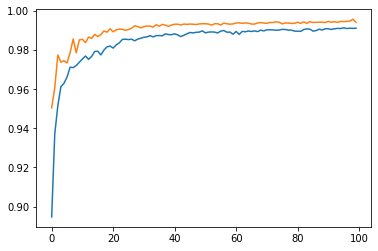

Epoch 1/70
2756/2756 [==============================] - 5s 2ms/step - loss: 0.5525 - acc: 0.8120 - val_loss: 0.1761 - val_acc: 0.9558
Epoch 2/70
2756/2756 [==============================] - 4s 2ms/step - loss: 0.2008 - acc: 0.9464 - val_loss: 0.1363 - val_acc: 0.9678
Epoch 3/70
2756/2756 [==============================] - 4s 2ms/step - loss: 0.1606 - acc: 0.9592 - val_loss: 0.1362 - val_acc: 0.9659
Epoch 4/70
2756/2756 [==============================] - 4s 2ms/step - loss: 0.1524 - acc: 0.9625 - val_loss: 0.1175 - val_acc: 0.9733
Epoch 5/70
2756/2756 [==============================] - 4s 2ms/step - loss: 0.1334 - acc: 0.9691 - val_loss: 0.1069 - val_acc: 0.9753
Epoch 6/70
2756/2756 [==============================] - 4s 2ms/step - loss: 0.1286 - acc: 0.9704 - val_loss: 0.0976 - val_acc: 0.9771
Epoch 7/70
2756/2756 [==============================] - 4s 2ms/step - loss: 0.1215 - acc: 0.9713 - val_loss: 0.0889 - val_acc: 0.9785
Epoch 8/70
2756/2756 [==============================] - 4s 2ms

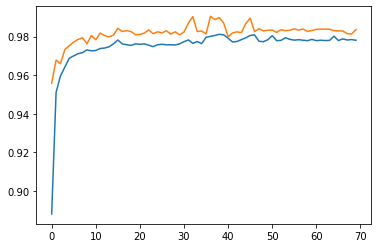

Epoch 1/100
2756/2756 [==============================] - 4s 1ms/step - loss: 0.6542 - acc: 0.7826 - val_loss: 0.3236 - val_acc: 0.8914
Epoch 2/100
2756/2756 [==============================] - 4s 1ms/step - loss: 0.3044 - acc: 0.9063 - val_loss: 0.2606 - val_acc: 0.9230
Epoch 3/100
2756/2756 [==============================] - 4s 1ms/step - loss: 0.2489 - acc: 0.9287 - val_loss: 0.2247 - val_acc: 0.9379
Epoch 4/100
2756/2756 [==============================] - 4s 1ms/step - loss: 0.2272 - acc: 0.9378 - val_loss: 0.2131 - val_acc: 0.9383
Epoch 5/100
2756/2756 [==============================] - 4s 1ms/step - loss: 0.2167 - acc: 0.9379 - val_loss: 0.2047 - val_acc: 0.9401
Epoch 6/100
2756/2756 [==============================] - 4s 1ms/step - loss: 0.2075 - acc: 0.9404 - val_loss: 0.2083 - val_acc: 0.9411
Epoch 7/100
2756/2756 [==============================] - 4s 1ms/step - loss: 0.2020 - acc: 0.9433 - val_loss: 0.2030 - val_acc: 0.9406
Epoch 8/100
2756/2756 [==============================] 

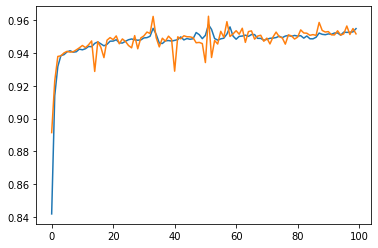

Epoch 1/100
3150/3150 [==============================] - 5s 2ms/step - loss: 63.9476 - acc: 0.6975 - val_loss: 0.6605 - val_acc: 0.6516
Epoch 2/100
3150/3150 [==============================] - 5s 2ms/step - loss: 0.5660 - acc: 0.7376 - val_loss: 0.3774 - val_acc: 0.8690
Epoch 3/100
3150/3150 [==============================] - 5s 2ms/step - loss: 0.3338 - acc: 0.8946 - val_loss: 0.2363 - val_acc: 0.9401
Epoch 4/100
3150/3150 [==============================] - 5s 2ms/step - loss: 0.9643 - acc: 0.9393 - val_loss: 0.8904 - val_acc: 0.7687
Epoch 5/100
3150/3150 [==============================] - 5s 2ms/step - loss: 0.4218 - acc: 0.8336 - val_loss: 52.6368 - val_acc: 0.9407
Epoch 6/100
3150/3150 [==============================] - 5s 2ms/step - loss: 2.1733 - acc: 0.8798 - val_loss: 0.4650 - val_acc: 0.7946
Epoch 7/100
3150/3150 [==============================] - 5s 2ms/step - loss: 0.4029 - acc: 0.8355 - val_loss: 0.3363 - val_acc: 0.8798
Epoch 8/100
3150/3150 [==============================

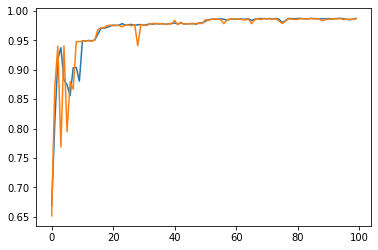

Epoch 1/100
3150/3150 [==============================] - 5s 1ms/step - loss: 0.5354 - acc: 0.8201 - val_loss: 0.2583 - val_acc: 0.9205
Epoch 2/100
3150/3150 [==============================] - 4s 1ms/step - loss: 0.2853 - acc: 0.9080 - val_loss: 0.2141 - val_acc: 0.9330
Epoch 3/100
3150/3150 [==============================] - 4s 1ms/step - loss: 0.2417 - acc: 0.9216 - val_loss: 0.1856 - val_acc: 0.9386
Epoch 4/100
3150/3150 [==============================] - 4s 1ms/step - loss: 0.2061 - acc: 0.9344 - val_loss: 0.1650 - val_acc: 0.9492
Epoch 5/100
3150/3150 [==============================] - 4s 1ms/step - loss: 0.1809 - acc: 0.9427 - val_loss: 0.1448 - val_acc: 0.9511
Epoch 6/100
3150/3150 [==============================] - 5s 1ms/step - loss: 0.1594 - acc: 0.9484 - val_loss: 0.1204 - val_acc: 0.9574
Epoch 7/100
3150/3150 [==============================] - 4s 1ms/step - loss: 0.1452 - acc: 0.9542 - val_loss: 0.1227 - val_acc: 0.9586
Epoch 8/100
3150/3150 [==============================] 

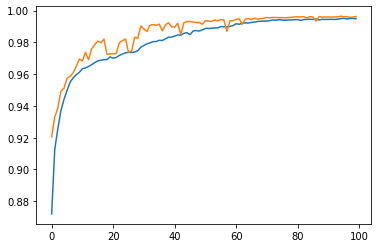

In [ ]:
earlystopping = EarlyStopping(monitor = 'val_loss', patience = 50, mode = 'min')
newpath = create_newpath()
model_no = 1
models_train_acc = []
models_test_acc = []
train_model(data, labels, newpath, models_train_acc, models_test_acc, model_no, earlystopping)
model_no = model_no + 1
train_model2(data, labels, newpath, models_train_acc, models_test_acc, model_no, earlystopping)
model_no = model_no + 1
train_model3(data, labels, newpath, models_train_acc, models_test_acc, model_no, earlystopping)
model_no = model_no + 1
train_model4(data, labels, newpath, models_train_acc, models_test_acc, model_no, earlystopping)
model_no = model_no + 1
train_model5(data, labels, newpath, models_train_acc, models_test_acc, model_no, earlystopping)


In [ ]:
# evaluating ensemble prediction
n_models = 5
all_models = load_all_models(n_models, newpath)

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.3, random_state = 25)
y_pred = ensemble_predictions(all_models, X_test)
print("Models Train Accuracies: ", models_train_acc)
print("Models Test Accuracies: ", models_test_acc)
y_test=np.argmax(y_test, axis = 1)
ensemble_accuracy = accuracy_score(y_test, y_pred)
print("The accuracy of ensemble prediction is :", ensemble_accuracy)

>loaded None\model_1.h5
>loaded None\model_2.h5
>loaded None\model_3.h5
>loaded None\model_4.h5
>loaded None\model_5.h5
result:  (37792,)
Models Train Accuracies:  [0.9956957101821899, 0.9830462336540222, 0.9521665573120117, 0.9877453446388245, 0.9966758489608765]
Models Test Accuracies:  [0.994046688079834, 0.9836208820343018, 0.95173579454422, 0.9867036938667297, 0.9962691068649292]
The accuracy of ensemble prediction is : 0.9898126587637596


In [ ]:
clf = DecisionTreeClassifier(criterion = 'entropy')
clf2 = RandomForestClassifier(n_estimators = 50, criterion = 'entropy')



In [ ]:
# Decision Tree Classifier
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 42)
clf = clf.fit(X_train, y_train)

# trained model evaluation on validation dataset
confidence = clf.score(X_test, y_test)

# validation data prediction
y_pred = clf.predict(X_test)

# model validation accuracy
accuracy = accuracy_score(y_test, y_pred)


# model classification report
clf_report = classification_report(y_test, y_pred)

# model cross validation score
score = cross_val_score(clf, X_test, y_test, cv = 3)
print('\nTraining Accuracy: ', confidence)
print('\nValidation Prediction: ', y_pred)
print('\nValidation Accuracy: ', accuracy)
print('\nCross Validation Score: \n', score)
print('\nClassification Report: \n', clf_report)



Training Accuracy:  0.9982536217503473

Validation Prediction:  [[0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]]

Validation Accuracy:  0.9982536217503473

Cross Validation Score: 
 [0.99452316 0.99559419 0.99499881]

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      9181
           1       1.00      1.00      1.00     13422
           2       0.99      1.00      1.00      2357
           3       0.97      0.97      0.97       224
           4       0.73      0.73      0.73        11

   micro avg       1.00      1.00      1.00     25195
   macro avg       0.94      0.94      0.94     25195
weighted avg       1.00      1.00      1.00     25195
 samples avg       1.00      1.00      1.00     25195



In [ ]:
# Random Forest Classifier
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.1, random_state = 25)
history = clf2.fit(X_train, y_train)

# trained model evaluation on validation dataset
confidence = history.score(X_test, y_test)

# validation data prediction
y_pred = history.predict(X_test)

# model validation accuracy
accuracy = accuracy_score(y_test, y_pred)


# model classification report
clf_report = classification_report(y_test, y_pred)

# model cross validation score
score = cross_val_score(history, X_test, y_test, cv = 3)
print('\nTraining Accuracy: ', confidence)
print('\nValidation Prediction: ', y_pred)
print('\nValidation Accuracy: ', accuracy)
print('\nCross Validation Score: \n', score)
print('\nClassification Report: \n', clf_report)


#Ensemble of 5 ANNs, decision tree and random forest
all_models = load_all_models(n_models, newpath)
all_models.append(clf2)
all_models.append(clf)
ensemble_predict = ensemble_predictions(all_models,X_test)
y_test = np.argmax(y_test, axis = 1)
print("Ensemble Accuracy: ", accuracy_score(y_test, ensemble_predict))


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Training Accuracy:  0.9989680901730433

Validation Prediction:  [[0. 1. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]]

Validation Accuracy:  0.9989680901730433

Cross Validation Score: 
 [0.99571429 0.99618957 0.9940462 ]

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      4522
           1       1.00      1.00      1.00      6794
           2       1.00      1.00      1.00      1175
           3       1.00      0.98      0.99       100
           4       1.00      0.57      0.73         7

   micro avg       1.00      1.00      1.00     12598
   macro avg       1.00      0.91      0.94     12598
weighted avg       1.00      1.00      1.00     12598
 samples avg       1.00      1.00      1.00     12598

>loaded None\model_1.h5
>loaded None\model_2.h5
>loaded None\model_3.h5
>loaded None\model_4.h5
>loaded None\model_5.h5
result:  (12598,)
Ensemble A

In [ ]:
# clustering

# projecting data
tsne = TSNE(n_components = 2, init = 'random', random_state = 0)
cluster_data = tsne.fit_transform(data)

# clustering using k means
kmeans = KMeans(n_clusters = 5, random_state = 0)
clusters = kmeans.fit_predict(cluster_data)

# permuting labels
cluster_labels = np.zeros_like(clusters)
for i in range(5):
    mask = (clusters == i)
    cluster_labels[mask] = mode(label[mask])

# computing accuracy
cluster_accuracy = accuracy_score(label, cluster_labels)
print("Clustering accuracy: ", cluster_accuracy)

Clustering accuracy:  0.6196645312884507


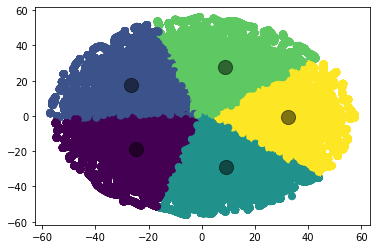

In [ ]:
# plotting clusters
pyplot.scatter(cluster_data[:, 0], cluster_data[:, 1], c = clusters, s = 50, cmap = 'viridis')
centers = kmeans.cluster_centers_
pyplot.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 200, alpha = 0.5);

(125973,)
Epoch 1/100
3543/3543 [==============================] - 5s 1ms/step - loss: 0.5594 - acc: 0.7424 - val_loss: 0.3098 - val_acc: 0.8703
Epoch 2/100
3543/3543 [==============================] - 5s 1ms/step - loss: 0.3743 - acc: 0.8301 - val_loss: 0.2717 - val_acc: 0.8831
Epoch 3/100
3543/3543 [==============================] - 5s 1ms/step - loss: 0.3366 - acc: 0.8468 - val_loss: 0.2481 - val_acc: 0.8915
Epoch 4/100
3543/3543 [==============================] - 5s 1ms/step - loss: 0.3106 - acc: 0.8557 - val_loss: 0.2315 - val_acc: 0.9024
Epoch 5/100
3543/3543 [==============================] - 5s 1ms/step - loss: 0.2980 - acc: 0.8604 - val_loss: 0.2210 - val_acc: 0.9015
Epoch 6/100
3543/3543 [==============================] - 5s 1ms/step - loss: 0.2886 - acc: 0.8657 - val_loss: 0.2145 - val_acc: 0.9090
Epoch 7/100
3543/3543 [==============================] - 5s 1ms/step - loss: 0.2825 - acc: 0.8694 - val_loss: 0.2180 - val_acc: 0.9047
Epoch 8/100
3543/3543 [======================

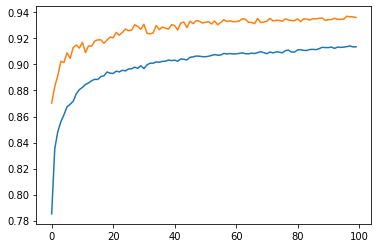

Epoch 1/70
2756/2756 [==============================] - 5s 2ms/step - loss: 0.5897 - acc: 0.7174 - val_loss: 0.3487 - val_acc: 0.8553
Epoch 2/70
2756/2756 [==============================] - 4s 2ms/step - loss: 0.3860 - acc: 0.8298 - val_loss: 0.3457 - val_acc: 0.8648
Epoch 3/70
2756/2756 [==============================] - 4s 2ms/step - loss: 0.3603 - acc: 0.8476 - val_loss: 0.2892 - val_acc: 0.8823
Epoch 4/70
2756/2756 [==============================] - 4s 2ms/step - loss: 0.3480 - acc: 0.8592 - val_loss: 0.2711 - val_acc: 0.8917
Epoch 5/70
2756/2756 [==============================] - 4s 2ms/step - loss: 0.3212 - acc: 0.8711 - val_loss: 0.2512 - val_acc: 0.8999
Epoch 6/70
2756/2756 [==============================] - 4s 2ms/step - loss: 0.2997 - acc: 0.8776 - val_loss: 0.2524 - val_acc: 0.9065
Epoch 7/70
2756/2756 [==============================] - 4s 2ms/step - loss: 0.2985 - acc: 0.8823 - val_loss: 0.2624 - val_acc: 0.8983
Epoch 8/70
2756/2756 [==============================] - 4s 2ms

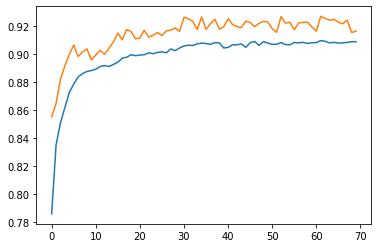

Epoch 1/100
2756/2756 [==============================] - 5s 2ms/step - loss: 0.7782 - acc: 0.7169 - val_loss: 0.4359 - val_acc: 0.8171
Epoch 2/100
2756/2756 [==============================] - 4s 1ms/step - loss: 0.4219 - acc: 0.8194 - val_loss: 0.3782 - val_acc: 0.8370
Epoch 3/100
2756/2756 [==============================] - 4s 1ms/step - loss: 0.3742 - acc: 0.8360 - val_loss: 0.3678 - val_acc: 0.8374
Epoch 4/100
2756/2756 [==============================] - 4s 1ms/step - loss: 0.3566 - acc: 0.8428 - val_loss: 0.3356 - val_acc: 0.8494
Epoch 5/100
2756/2756 [==============================] - 4s 1ms/step - loss: 0.3469 - acc: 0.8452 - val_loss: 0.3314 - val_acc: 0.8579
Epoch 6/100
2756/2756 [==============================] - 4s 1ms/step - loss: 0.3333 - acc: 0.8532 - val_loss: 0.3639 - val_acc: 0.8360
Epoch 7/100
2756/2756 [==============================] - 4s 1ms/step - loss: 0.3198 - acc: 0.8631 - val_loss: 0.3629 - val_acc: 0.8313
Epoch 8/100
2756/2756 [==============================] 

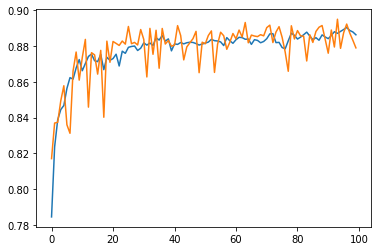

Epoch 1/100
3150/3150 [==============================] - 5s 2ms/step - loss: 1181.6404 - acc: 0.7401 - val_loss: 0.3425 - val_acc: 0.8242
Epoch 2/100
3150/3150 [==============================] - 5s 2ms/step - loss: 0.3225 - acc: 0.8491 - val_loss: 0.2506 - val_acc: 0.8837
Epoch 3/100
3150/3150 [==============================] - 5s 2ms/step - loss: 0.2461 - acc: 0.8793 - val_loss: 0.2011 - val_acc: 0.8993
Epoch 4/100
3150/3150 [==============================] - 5s 2ms/step - loss: 0.2215 - acc: 0.8885 - val_loss: 0.2443 - val_acc: 0.8877
Epoch 5/100
3150/3150 [==============================] - 5s 2ms/step - loss: 0.2125 - acc: 0.8920 - val_loss: 0.1970 - val_acc: 0.9196
Epoch 6/100
3150/3150 [==============================] - 5s 2ms/step - loss: 0.2041 - acc: 0.8988 - val_loss: 0.1970 - val_acc: 0.9003
Epoch 7/100
3150/3150 [==============================] - 5s 2ms/step - loss: 0.1995 - acc: 0.8989 - val_loss: 0.2178 - val_acc: 0.8946
Epoch 8/100
3150/3150 [=============================

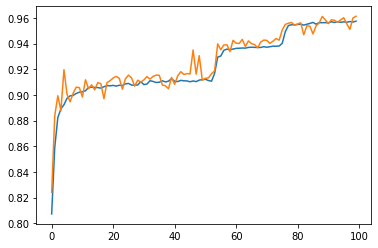

Epoch 1/100
3150/3150 [==============================] - 5s 1ms/step - loss: 0.7454 - acc: 0.6753 - val_loss: 0.3520 - val_acc: 0.8256
Epoch 2/100
3150/3150 [==============================] - 5s 1ms/step - loss: 0.4119 - acc: 0.8123 - val_loss: 0.2966 - val_acc: 0.8475
Epoch 3/100
3150/3150 [==============================] - 5s 1ms/step - loss: 0.3417 - acc: 0.8455 - val_loss: 0.2510 - val_acc: 0.8918
Epoch 4/100
3150/3150 [==============================] - 5s 1ms/step - loss: 0.3037 - acc: 0.8615 - val_loss: 0.2389 - val_acc: 0.8884
Epoch 5/100
3150/3150 [==============================] - 5s 1ms/step - loss: 0.2836 - acc: 0.8683 - val_loss: 0.2244 - val_acc: 0.8982
Epoch 6/100
3150/3150 [==============================] - 5s 1ms/step - loss: 0.2685 - acc: 0.8755 - val_loss: 0.2214 - val_acc: 0.8916
Epoch 7/100
3150/3150 [==============================] - 5s 1ms/step - loss: 0.2528 - acc: 0.8820 - val_loss: 0.2215 - val_acc: 0.9015
Epoch 8/100
3150/3150 [==============================] 

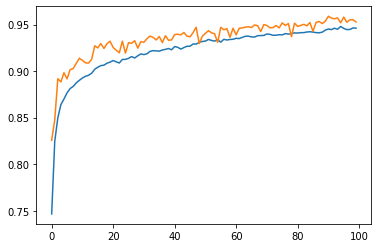

In [ ]:
# predicting labels after clustering
print(cluster_labels.shape)
earlystopping = EarlyStopping(monitor = 'val_loss', patience = 50, mode = 'min')
cluster_labels = np.asarray(cluster_labels).astype(np.float32)
cluster_labels = to_categorical(cluster_labels,num_classes=5)

cluster_path = create_cluster_path()
n_models = 5
model_num=1
cluster_train_acc=[]
cluster_test_acc=[]
# Training all ANN models on clusters
train_model(data, cluster_labels, cluster_path,cluster_train_acc,cluster_test_acc,model_num, earlystopping)
model_num = model_num + 1
train_model2(data, cluster_labels, cluster_path,cluster_train_acc,cluster_test_acc,model_num, earlystopping)
model_num = model_num + 1
train_model3(data, cluster_labels, cluster_path,cluster_train_acc,cluster_test_acc,model_num, earlystopping)
model_num = model_num + 1
train_model4(data, cluster_labels, cluster_path,cluster_train_acc,cluster_test_acc,model_num, earlystopping)
model_num = model_num + 1
train_model5(data, cluster_labels, cluster_path,cluster_train_acc,cluster_test_acc,model_num, earlystopping)


In [ ]:
n_models = 5
#Load all ANN models
cluster_models = load_all_models(n_models,cluster_path)
# Decision tree and random forest on clusters
X_train, X_test, y_train, y_test = train_test_split(data, cluster_labels, test_size = 0.1, random_state = 25)
history = clf2.fit(X_train, y_train)
history2 = clf.fit(X_train, y_train)
cluster_clf_pred = history2.predict(X_test)
cluster_clf2_pred = history.predict(X_test)
# Appending decision tree and random forest in list of models
cluster_models.append(clf2)
cluster_models.append(clf)
y_pred = ensemble_predictions(cluster_models, X_test)
y_Test = y_test
y_test = np.argmax(y_test, axis = 1) 
# Calculating ensemble accuracy
ensemble_accuracy = accuracy_score(y_test, y_pred)
# Printing all prediction results
print("Cluster train accuracies: ", cluster_train_acc)
print("Cluster test accuracies: ", cluster_test_acc)
print("Cluster decision tree accuracy: ", accuracy_score(y_Test, cluster_clf2_pred))
print("Cluster random forest accuracy: ", accuracy_score(y_Test, cluster_clf_pred))
print("The accuracy of ensemble prediction is :", ensemble_accuracy)

>loaded None\model_1.h5
>loaded None\model_2.h5
>loaded None\model_3.h5
>loaded None\model_4.h5
>loaded None\model_5.h5
result:  (12598,)
Cluster train accuracies:  [0.9364410042762756, 0.9163085222244263, 0.8781823515892029, 0.9612911343574524, 0.9542757272720337]
Cluster test accuracies:  [0.936100959777832, 0.916543185710907, 0.8790484666824341, 0.9612621665000916, 0.9526890516281128]
Cluster decision tree accuracy:  0.9898396570884267
Cluster random forest accuracy:  0.99690427051913
The accuracy of ensemble prediction is : 0.9877758374345134
